<a href="https://colab.research.google.com/github/Tarane2028/ADS500B/blob/main/Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving modcloth_final_data.json to modcloth_final_data.json


In [ ]:
import pandas as pd
import json

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Read the file line by line and parse JSON objects
data_list = []
with open(file_name, 'r') as f:
    for line in f:
        line = line.strip()
        if line:  # Skip empty lines
            data_list.append(json.loads(line))

# Convert the list into a DataFrame
modcloth_data = pd.DataFrame(data_list)

# Create the 'labels' variable from the 'quality' column
labels = modcloth_data['quality']

# Display the column names and first few rows of the DataFrame to verify
print(modcloth_data.columns)
print(modcloth_data.head())

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')
  item_id waist  size  quality cup size hips bra size category bust   height  \
0  123373    29     7      5.0        d   38       34      new   36  5ft 6in   
1  123373    31    13      3.0        b   30       36      new  NaN  5ft 2in   
2  123373    30     7      2.0        b  NaN       32      new  NaN  5ft 7in   
3  123373   NaN    21      5.0     dd/e  NaN      NaN      new  NaN      NaN   
4  123373   NaN    18      5.0        b  NaN       36      new  NaN  5ft 2in   

          user_name         length    fit user_id shoe size shoe width  \
0             Emily     just right  small  991571       NaN        NaN   
1  sydneybraden2001     just right  small  587883       NaN        NaN   
2             Ugggh  slightly long  small  395665  

In [ ]:
# Convert 'waist' and 'size' columns to numeric, coerce errors to NaN
modcloth_data['waist'] = pd.to_numeric(modcloth_data['waist'], errors='coerce')
modcloth_data['size'] = pd.to_numeric(modcloth_data['size'], errors='coerce')

# Display the first few rows to verify conversion
print(modcloth_data[['waist', 'size']].head())

   waist  size
0   29.0     7
1   31.0    13
2   30.0     7
3    NaN    21
4    NaN    18


In [ ]:
# Drop rows with any NaN values in 'waist' or 'size'
modcloth_data.dropna(subset=['waist', 'size'], inplace=True)

# Display the first few rows to verify handling of missing values
print(modcloth_data[['waist', 'size']].head())

   waist  size
0   29.0     7
1   31.0    13
2   30.0     7
5   27.0    11
6   26.0     5


In [ ]:
# Create a new feature: ratio of waist to size
modcloth_data['waist_size_ratio'] = modcloth_data['waist'] / modcloth_data['size']

# Handle any potential infinite or NaN values resulting from division
modcloth_data['waist_size_ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
modcloth_data['waist_size_ratio'].fillna(0, inplace=True)

# Select relevant features for modeling
selected_features = modcloth_data[['waist', 'size', 'waist_size_ratio']]

# Display the first few rows to verify new feature
print(modcloth_data.head())

  item_id  waist  size  quality cup size hips bra size category bust   height  \
0  123373   29.0     7      5.0        d   38       34      new   36  5ft 6in   
1  123373   31.0    13      3.0        b   30       36      new  NaN  5ft 2in   
2  123373   30.0     7      2.0        b  NaN       32      new  NaN  5ft 7in   
3  123373    NaN    21      5.0     dd/e  NaN      NaN      new  NaN      NaN   
4  123373    NaN    18      5.0        b  NaN       36      new  NaN  5ft 2in   

          user_name         length    fit user_id shoe size shoe width  \
0             Emily     just right  small  991571       NaN        NaN   
1  sydneybraden2001     just right  small  587883       NaN        NaN   
2             Ugggh  slightly long  small  395665      9.00        NaN   
3      alexmeyer626     just right    fit  875643       NaN        NaN   
4        dberrones1  slightly long  small  944840       NaN        NaN   

  review_summary review_text  waist_size_ratio  
0            NaN   

In [ ]:
# Ensure 'waist' and 'size' are numeric and handle NaNs
modcloth_data['waist'] = pd.to_numeric(modcloth_data['waist'], errors='coerce')
modcloth_data['size'] = pd.to_numeric(modcloth_data['size'], errors='coerce')

# Drop rows with NaNs in 'waist' or 'size'
modcloth_data.dropna(subset=['waist', 'size'], inplace=True)

# Create the 'labels' variable from the 'quality' column after dropping NaNs
labels = modcloth_data['quality'].dropna()

# Ensure the DataFrame and labels have consistent lengths
modcloth_data = modcloth_data.loc[labels.index]

# Create the new feature: ratio of waist to size
modcloth_data['waist_size_ratio'] = modcloth_data['waist'] / modcloth_data['size']

# Handle any potential infinite values resulting from division
modcloth_data['waist_size_ratio'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)
modcloth_data['waist_size_ratio'].fillna(0, inplace=True)

# Select relevant features for modeling
selected_features = modcloth_data[['waist', 'size', 'waist_size_ratio']]

# Verify consistent lengths
print(selected_features.shape)
print(labels.shape)

(2843, 3)
(2843,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.46045694200351495
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        14
         2.0       0.50      0.03      0.06        34
         3.0       0.29      0.05      0.09        74
         4.0       0.34      0.26      0.30       171
         5.0       0.51      0.77      0.61       276

    accuracy                           0.46       569
   macro avg       0.33      0.22      0.21       569
weighted avg       0.42      0.46      0.40       569



In [ ]:
import re

# Function to convert height from string to inches
def convert_height(height):
    if pd.isnull(height):
        return None
    match = re.match(r'(\d+)ft (\d+)in', height)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return feet * 12 + inches
    return None

# Apply the conversion to the 'height' column
modcloth_data['height'] = modcloth_data['height'].apply(convert_height)

# Display the first few rows to verify conversion
print(modcloth_data[['height']].head())

   height
0    66.0
1    62.0
2    67.0
5    64.0
6    63.0


In [ ]:
# Function to handle bust outliers and convert to numeric
def convert_bust(bust):
    if pd.isnull(bust):
        return None
    try:
        bust = float(bust)
        # Handle outliers (e.g., bust values that are unreasonably high or low)
        if bust > 100 or bust < 20:  # Adjust thresholds as necessary
            return None
        return bust
    except ValueError:
        return None

# Apply the conversion to the 'bust' column
modcloth_data['bust'] = modcloth_data['bust'].apply(convert_bust)

# Display the first few rows to verify conversion
print(modcloth_data[['bust']].head())

   bust
0  36.0
1   NaN
2   NaN
5   NaN
6   NaN


In [ ]:
# Convert specified columns to numeric, coerce errors to NaN
variables = ['waist', 'size', 'hips', 'bra size', 'shoe size']
for var in variables:
    modcloth_data[var] = pd.to_numeric(modcloth_data[var], errors='coerce')

# Drop rows with NaNs in the specified variables
modcloth_data.dropna(subset=variables + ['height', 'bust'], inplace=True)

# Create the 'labels' variable from the 'quality' column after dropping NaNs
labels = modcloth_data['quality'].dropna()

# Ensure the DataFrame and labels have consistent lengths
modcloth_data = modcloth_data.loc[labels.index]

# Select relevant features for modeling
selected_features = modcloth_data[variables + ['height', 'bust']]

# Verify consistent lengths and display the first few rows
print(selected_features.shape)
print(labels.shape)
print(selected_features.head())

(588, 7)
(588,)
      waist  size  hips  bra size  shoe size  height  bust
1069   30.0     8  40.0      36.0        8.5    67.0  36.0
1750   27.0     8  34.0      34.0        8.0    59.0  38.0
1751   33.0    12  36.0      38.0        7.5    63.0  38.0
2336   49.0    32  51.0      42.0        9.5    66.0  51.0
2367   31.0     8  41.0      34.0        8.5    66.0  36.0


<ipython-input-31-2b24beeb86f7>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modcloth_data['height'].dropna())


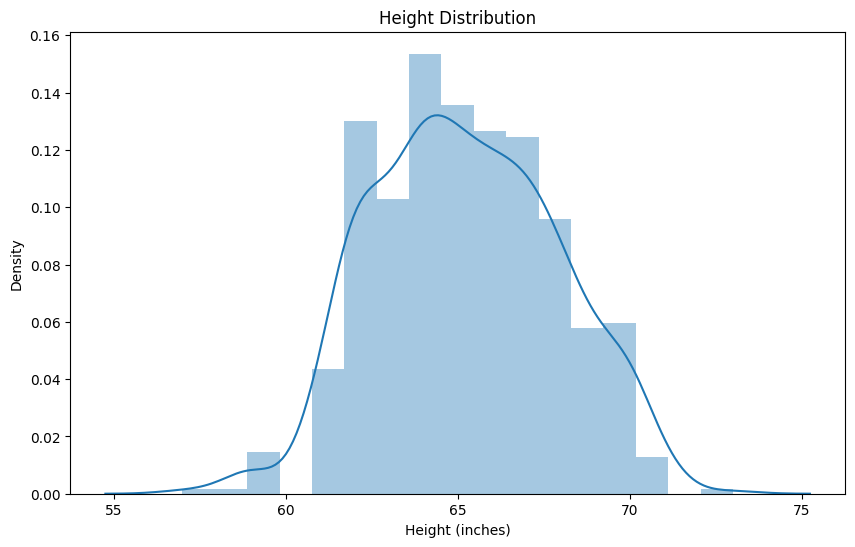

<ipython-input-31-2b24beeb86f7>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(modcloth_data['waist'].dropna())


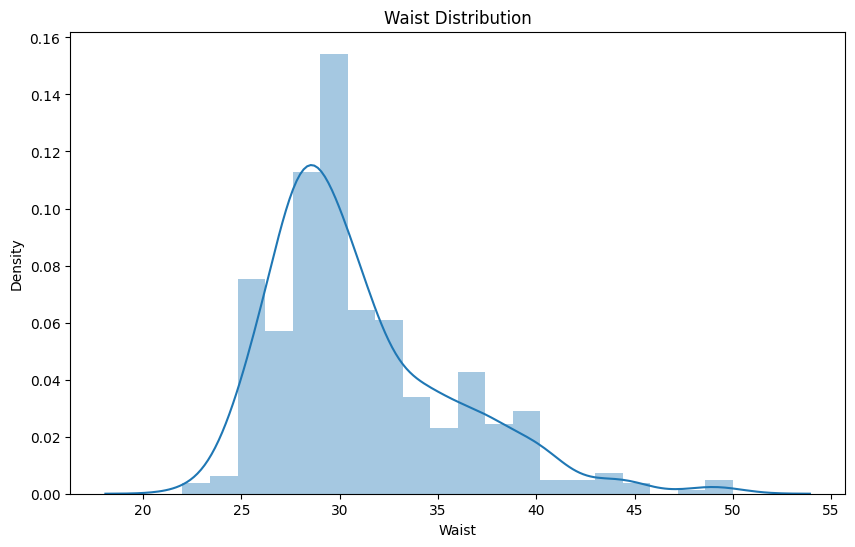

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the height distribution
plt.figure(figsize=(10, 6))
sns.distplot(modcloth_data['height'].dropna())
plt.title('Height Distribution')
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.show()

# Plot the waist distribution
plt.figure(figsize=(10, 6))
sns.distplot(modcloth_data['waist'].dropna())
plt.title('Waist Distribution')
plt.xlabel('Waist')
plt.ylabel('Density')
plt.show()

Unbalanced Model
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.04      0.08      0.05        13
         3.0       0.12      0.18      0.14        34
         4.0       0.31      0.44      0.37        87
         5.0       0.43      0.25      0.31       137

    accuracy                           0.29       276
   macro avg       0.18      0.19      0.18       276
weighted avg       0.33      0.29      0.29       276



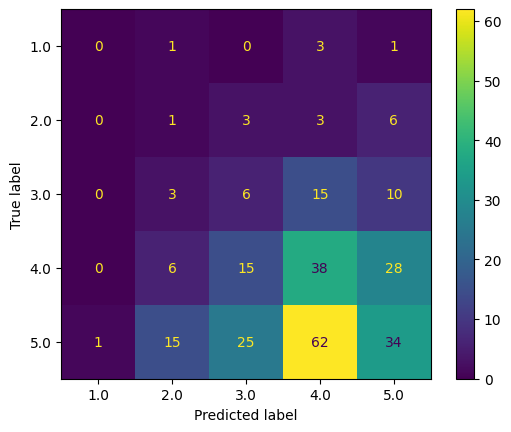

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

# Select categorical features
categorical_features = ['cup size', 'length', 'category']
cat_data = modcloth_data[categorical_features].dropna()

# OneHotEncode the categorical features
encoder = OneHotEncoder()
cat_feat = encoder.fit_transform(cat_data)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(cat_feat, labels.loc[cat_data.index], test_size=0.5, random_state=42)

# Balanced Perceptron model
balanced_model = make_pipeline(Perceptron(class_weight='balanced'))
balanced_model.fit(X_train, y_train)
y_pred_balanced = balanced_model.predict(X_test)

# Unbalanced Perceptron model
unbalanced_model = make_pipeline(Perceptron())
unbalanced_model.fit(X_train, y_train)
y_pred_unbalanced = unbalanced_model.predict(X_test)

# Plot confusion matrix and classification report for balanced model
print("Unbalanced Model")
print(metrics.classification_report(y_test, y_pred_unbalanced))
ConfusionMatrixDisplay.from_estimator(unbalanced_model, X_test, y_test)
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import cross_val_score

# Include all relevant numeric features
numeric_features = ['waist', 'size', 'hips', 'bra size', 'shoe size', 'height', 'bust']
num_data = modcloth_data[numeric_features]

# SimpleImputer pipeline
imputer_pipeline = make_pipeline(SimpleImputer(strategy='mean'), Perceptron(class_weight='balanced'))
scores_imputer = cross_val_score(imputer_pipeline, num_data, labels, cv=5, scoring='accuracy')

# Normalizer pipeline
normalizer_pipeline = make_pipeline(SimpleImputer(strategy='mean'), Normalizer(), Perceptron(class_weight='balanced'))
scores_normalizer = cross_val_score(normalizer_pipeline, num_data, labels, cv=5, scoring='accuracy')

# StandardScaler pipeline
scaler_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), Perceptron(class_weight='balanced'))
scores_scaler = cross_val_score(scaler_pipeline, num_data, labels, cv=5, scoring='accuracy')

# Report scores
import numpy as np
pipeline_names = ["Imputer", "Normalizer", "StandardScaler"]
scores = [scores_imputer, scores_normalizer, scores_scaler]

table = pd.DataFrame({
    "Pipeline": pipeline_names,
    "Min Accuracy": [np.min(score) for score in scores],
    "Max Accuracy": [np.max(score) for score in scores],
    "Mean Accuracy": [np.mean(score) for score in scores]
})

print(table)

         Pipeline  Min Accuracy  Max Accuracy  Mean Accuracy
0         Imputer      0.119658      0.508475       0.379024
1      Normalizer      0.059829      0.504274       0.299261
2  StandardScaler      0.152542      0.288136       0.219339


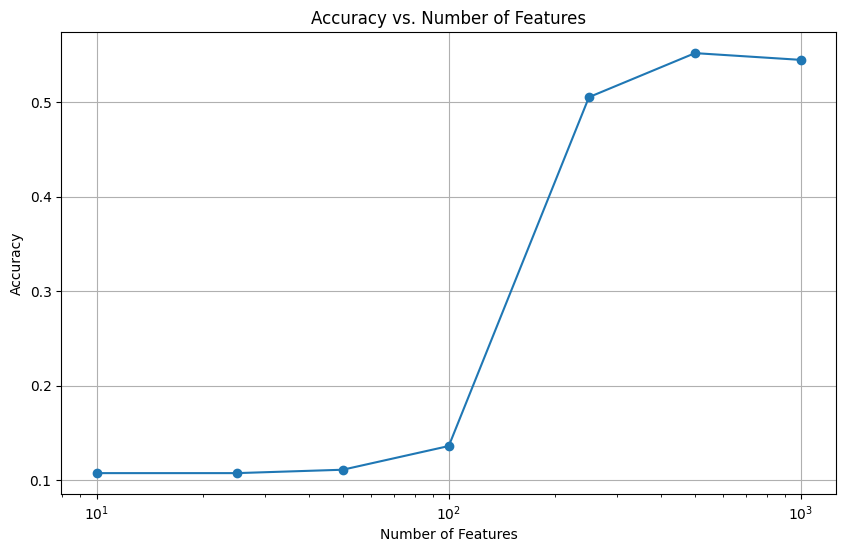

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

# Process review text
corpus = modcloth_data['review_text'].dropna()
labels_with_reviews = labels.loc[corpus.index]

# Vectorize the text
vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(corpus)

# Create DataFrame from sparse matrix
X_text_df = pd.DataFrame.sparse.from_spmatrix(X_text, columns=vectorizer.get_feature_names_out())

# Feature selection using SelectKBest and chi2
k_values = [10, 25, 50, 100, 250, 500, 1000, 10000]
k_values = [k for k in k_values if k <= X_text.shape[1]]  # Ensure k does not exceed the number of features
accuracy_scores = []

for k in k_values:
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X_text, labels_with_reviews)
    X_train, X_test, y_train, y_test = train_test_split(X_new, labels_with_reviews, test_size=0.5, random_state=42)
    clf = Perceptron(class_weight='balanced')
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Plot accuracy vs. number of features
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()